## 1. Load the Dataset

In [3]:
import pandas as pd

df = pd.read_csv("cleaned_calendar.csv")  

df['date'] = pd.to_datetime(df['date'], errors='coerce')

## 2. Number of Listings Over Time

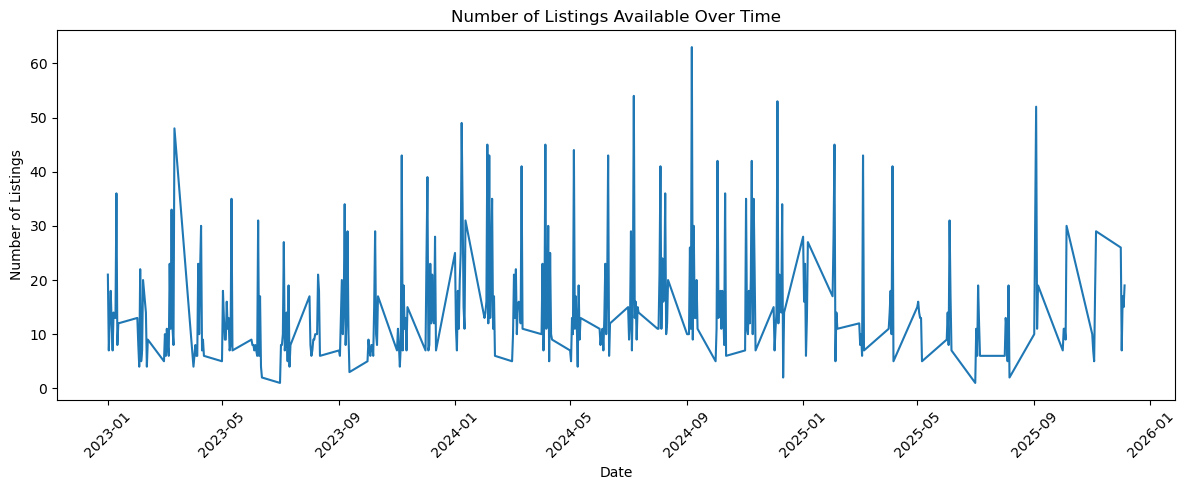

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

date_counts = df['date'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=date_counts.index, y=date_counts.values)
plt.title("Number of Listings Available Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. HeatMap by Month & Day

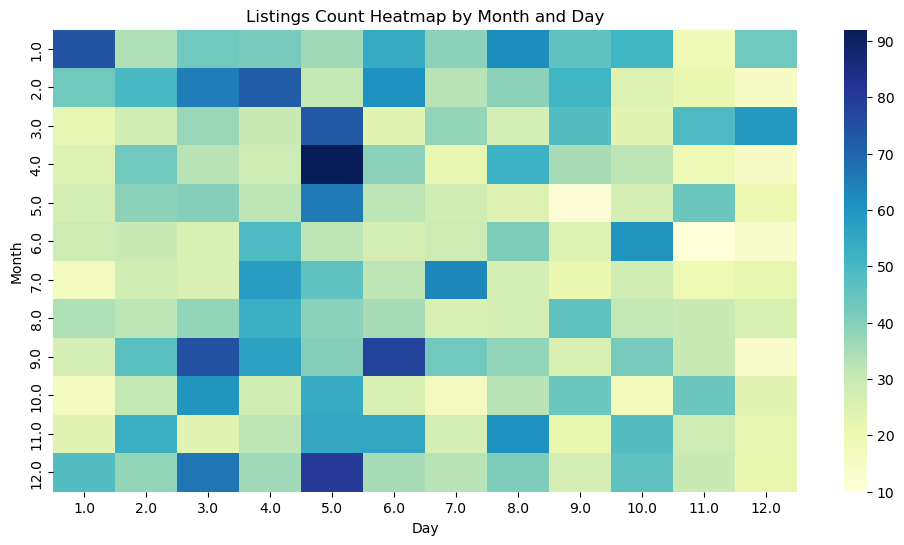

In [7]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

heatmap_data = df.groupby(['month', 'day']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Listings Count Heatmap by Month and Day")
plt.xlabel("Day")
plt.ylabel("Month")
plt.show()

## 4. Most Active Listings by Frequency

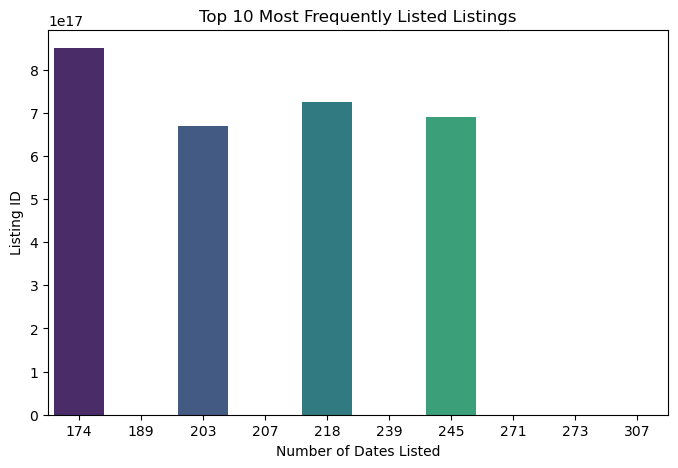

In [8]:
top_listings = df['listing_id'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_listings.values, y=top_listings.index, palette='viridis')
plt.title("Top 10 Most Frequently Listed Listings")
plt.xlabel("Number of Dates Listed")
plt.ylabel("Listing ID")
plt.show()

## 5. Histogram generator for Calendar availability Distribution

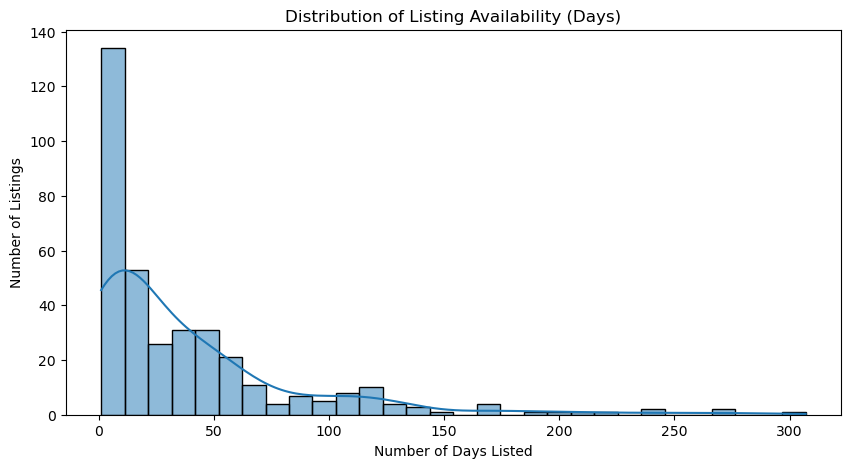

In [9]:
listing_freq = df['listing_id'].value_counts()

plt.figure(figsize=(10,5))
sns.histplot(listing_freq, bins=30, kde=True)
plt.title("Distribution of Listing Availability (Days)")
plt.xlabel("Number of Days Listed")
plt.ylabel("Number of Listings")
plt.show()